# Exploratory Data Analysis

In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

autocast_questions = json.load(open('../../autocast_questions.json')) # from the Autocast dataset
test_questions = json.load(open('../../autocast_competition_test_set.json'))
test_ids = [q['id'] for q in test_questions]
# Create a dataframe with the questions
df = pd.DataFrame(autocast_questions)
df.head()

,question,id,background,publish_time,close_time,tags,source_links,prediction_count,forecaster_count,answer,choices,status,qtype,crowd
0,What will the end-of-day closing value for the...,G1,Outcome will be determined by the end-of-day c...,2015-09-01 13:49:29.860000+00:00,2016-01-01 17:00:01+00:00,"[Finance, Economic Indicators]",[http://ftalphaville.ft.com/2015/08/17/2137329...,1549,385,D,"[Less than 6.30, Between 6.30 and 6.35, inclus...",Resolved,mc,"[{'timestamp': '2015-09-01 00:00:00+00:00', 'f..."
1,How many seats will the Justice and Developmen...,G2,The Justice and Development Party (AKP) failed...,2015-09-01 13:54:25.050000+00:00,2015-11-01 22:00:20+00:00,"[Elections and Referenda, Non-US Politics]",[http://www.al-monitor.com/pulse/originals/201...,567,194,A,"[A majority, A plurality, Not a plurality]",Resolved,mc,"[{'timestamp': '2015-09-01 00:00:00+00:00', 'f..."
2,Will there be an initial public offering on ei...,G4,China suspended initial public offerings (IPOs...,2015-09-01 13:58:30.138000+00:00,2015-11-30 14:00:15+00:00,[Finance],[http://atimes.com/2015/11/china-will-allow-su...,545,148,yes,"[yes, no]",Resolved,t/f,"[{'timestamp': '2015-09-01 00:00:00+00:00', 'f..."
3,Will the Export-Import Bank of the United Stat...,G5,The Export-Import Bank's authorization expired...,2015-09-01 14:02:21.242000+00:00,2015-12-04 14:00:25+00:00,"[Economic Policy, US Politics, US Policy]",[http://thehill.com/policy/finance/260118-week...,1000,379,yes,"[yes, no]",Resolved,t/f,"[{'timestamp': '2015-09-01 00:00:00+00:00', 'f..."
4,Will a trilateral meeting take place between C...,G6,"A trilateral meeting of leaders from China, Ja...",2015-09-01 14:04:41.470000+00:00,2015-12-31 23:00:11+00:00,[Foreign Policy],"[https://en.wikipedia.org/wiki/Li_Keqiang, htt...",946,385,no,"[yes, no]",Resolved,t/f,"[{'timestamp': '2015-09-01 00:00:00+00:00', 'f..."


# Visualize the data

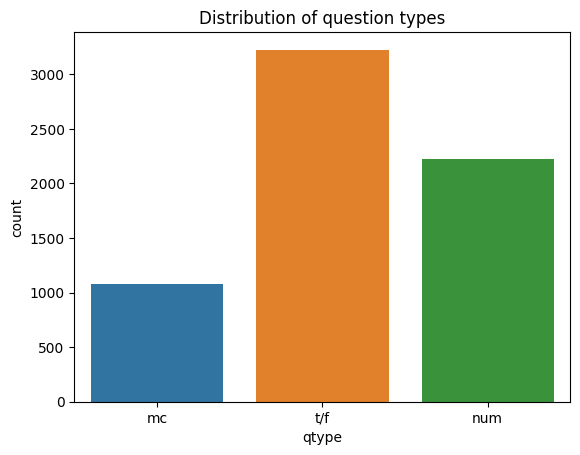

In [34]:
# Show the distribution of the question types
df['qtype'].value_counts()

# Plot the distribution of the question types
sns.countplot(x='qtype', data=df)
plt.title('Distribution of question types')
plt.show()

/var/folders/p1/ghfjrpn908z1gs64vp01by040000gn/T/ipykernel_19788/1579462619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_df['nchoices'] = mc_df['choices'].apply(lambda x: len(x))


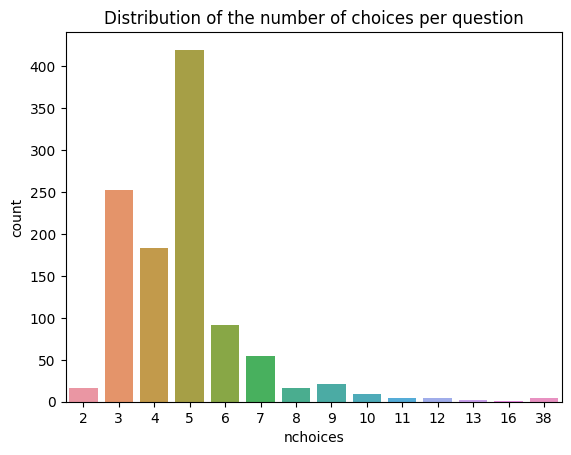

In [33]:
# make a df with only the multiple choice questions
mc_df = df[df['qtype'] == 'mc']

# Plot the distribution of the number of choices per question using lambda
mc_df['nchoices'] = mc_df['choices'].apply(lambda x: len(x))
sns.countplot(x='nchoices', data=mc_df)
plt.title('Distribution of the number of choices per question')
plt.show()

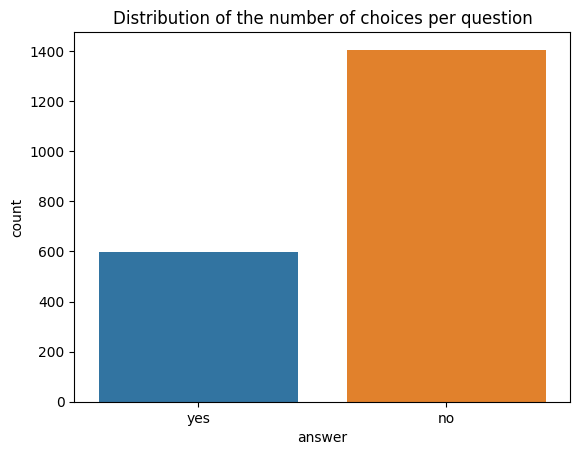

In [43]:
# In t/f questions, show the distribution of 'yes' vs 'no' answers
tf_df = df[df['qtype'] == 't/f']
sns.countplot(x='answer', data=tf_df)
plt.title('Distribution of the number of choices per question')
plt.show()

/var/folders/p1/ghfjrpn908z1gs64vp01by040000gn/T/ipykernel_19788/3313415856.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['answer'])


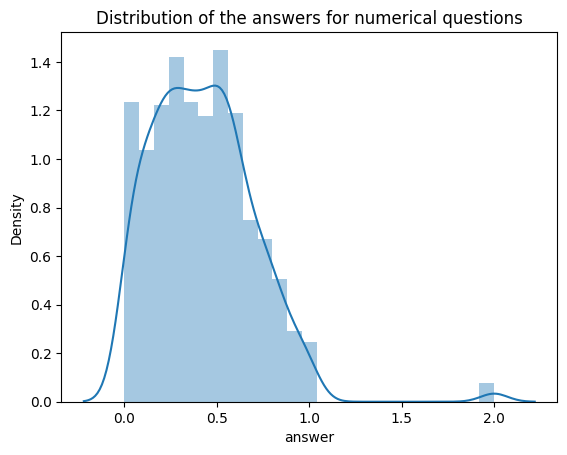

In [44]:
# For numerical questions, show the distribution of the answers
num_df = df[df['qtype'] == 'num']
sns.distplot(num_df['answer'])
plt.title('Distribution of the answers for numerical questions')
plt.show()

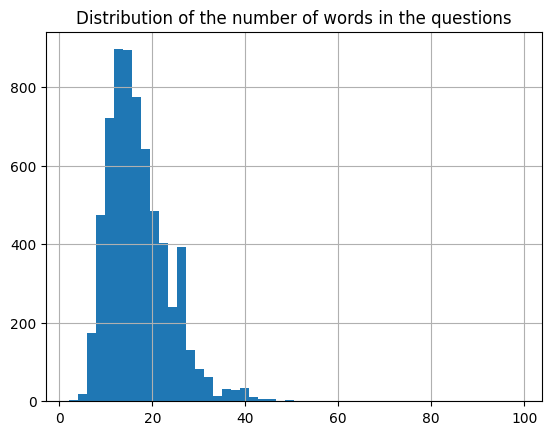

In [35]:
# Show the distribution of the number of words in the questions
df['num_words'] = df['question'].apply(lambda x: len(x.split()))
df['num_words'].hist(bins=50)
plt.title('Distribution of the number of words in the questions')
plt.show()